In [29]:
!pip install -Uq matplotlib

In [11]:
import plotly.graph_objects as go
import numpy as np

# Rango de valores x
x_vals = np.linspace(0, 10, 101)

# Ruta local o URL de la imagen
img_url = "images/earth.png"  # Asegúrate de que el archivo exista si usas local

# Crear los frames con la imagen moviéndose
frames = [
    go.Frame(
        name=f"{x:.1f}",
        layout=go.Layout(
            images=[
                dict(
                    source=img_url,
                    xref="x",
                    yref="y",
                    x=x,
                    y=np.sin(x),
                    sizex=1,
                    sizey=1,
                    xanchor="center",
                    yanchor="middle",
                    layer="above"
                )
            ]
        )
    )
    for x in x_vals
]

# Layout inicial con la primera imagen
layout = go.Layout(
    title="Imagen moviéndose con slider",
    xaxis=dict(range=[-3, 3]),
    yaxis=dict(range=[-3, 3]),
    images=[
        dict(
            source=img_url,
            xref="x",
            yref="y",
            x=x_vals[0],
            y=np.sin(x_vals[0]),
            sizex=1,
            sizey=1,
            xanchor="center",
            yanchor="middle",
            layer="above"
        )
    ],
    sliders=[{
        "active": 0,
        "steps": [
            {
                "label": f"{x:.1f}",
                "method": "animate",
                "args": [
                    [f"{x:.1f}"],
                    {
                        "mode": "immediate",
                        "transition": {"duration": 0},
                        "frame": {"duration": 0, "redraw": True}
                    }
                ]
            }
            for x in x_vals
        ]
    }],
    updatemenus=[{
        "type": "buttons",
        "showactive": False,
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [
                    None,
                    {
                        "fromcurrent": True,
                        "frame": {"duration": 50, "redraw": True},
                        "transition": {"duration": 0}
                    }
                ]
            },
            {
                "label": "Pause",
                "method": "animate",
                "args": [
                    [None],
                    {
                        "mode": "immediate",
                        "transition": {"duration": 0},
                        "frame": {"duration": 0, "redraw": False}
                    }
                ]
            }
        ]
    }],
    # paper_bgcolor='rgba(0,0,0,0)', 
    # plot_bgcolor='rgba(0,0,0,0)'
)

# Crear figura (vacía, solo con layout)
# tamaño de la figura cuadrado
fig = go.Figure(data=[], layout=layout, frames=frames)

# Mostrar en Jupyter
fig.show()

# (Opcional) exportar a archivo para cargarlo con Plotly.js
fig.write_json("animacion_imagen.json")


In [56]:
def create_arrow(size, w=2):
    arrow = [
        *[[ 0, *[1]*(w+1), 0]]*size,
    ]
    for n in range(w, -1, -1):
        arrow.append([0]*(w-n) + [1]*(w*n+1) + [0]*(w-n))

    print(arrow)
    return np.array(arrow)
arr = create_arrow(5,3)
arr

[[0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.

In [8]:
def create_arrow(size, w=5, tail_width=None):
    # Si no se especifica el ancho de la cola, usar la mitad del ancho de la punta
    if tail_width is None:
        tail_width = max(1, w // 2)
    
    # Ancho total de la flecha (determinado por la punta)
    total_width = 2*w + 1
    
    # Parte superior (tallo de la flecha)
    arrow = []
    for _ in range(size*2):
        # Centrar el tallo
        padding_left = (total_width - tail_width) // 2
        padding_right = total_width - tail_width - padding_left
        row = [0] * padding_left + [1] * tail_width + [0] * padding_right
        arrow.append(row)
    
    # Parte inferior (punta de la flecha)
    for n in range(w, -1, -1):
        width_ones = 2*n + 1
        padding = (total_width - width_ones) // 2
        row = [0] * padding + [1] * width_ones + [0] * padding
        arrow.append(row)

    for i in range(size*2, 20):
        arrow.append([0]*total_width)
    
    return np.array(arrow)
arr = create_arrow(1,5, 5)
arr

array([[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

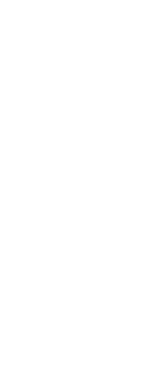

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que `arr` es una matriz con valores 0 y 1
def show_with_transparency(arr, name="arrow"):
    # Convertir a imagen RGBA
    rgba = np.zeros((*arr.shape, 4), dtype=np.float32)
    
    # Color blanco donde arr == 1
    rgba[arr == 1] = [1, 1, 1, 1]  # R, G, B, A = 1 (blanco opaco)
    
    # Transparente donde arr == 0 (RGBA = 0,0,0,0)
    # Ya está inicializado a ceros, así que no se necesita más

    # Mostrar
    plt.imshow(rgba, interpolation='nearest')
    plt.imsave(f"images/arrows/{name}.png", rgba, format='png') 
    plt.axis('off')
    # plt.show()

def show_with_transparency(arr, name="arrow"):
    # Convertir a imagen RGBA
    rgba = np.zeros((arr.shape[0] * 2, arr.shape[1] * 2, 4), dtype=np.float32)
    
    # Expandir cada píxel a un bloque de 2x2
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            rgba[i*2:i*2+2, j*2:j*2+2] = [1, 1, 1, 1] if arr[i, j] == 1 else [0, 0, 0, 0]
    
    # Mostrar
    plt.imshow(rgba, interpolation='nearest')
    plt.imsave(f"images/arrows/{name}.png", rgba, format='png') 
    plt.axis('off')

# Usa tu matriz

arr = create_arrow(1, 4, 5)
show_with_transparency(arr)

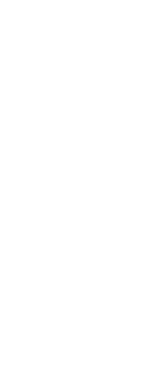

In [12]:
for i in range(0,11):
    arr = create_arrow(i, 4, 5)
    show_with_transparency(arr, i)

In [49]:
import numpy as np
import plotly.graph_objects as go

# Constantes
c = 1
u_values = np.linspace(0, 0.99, 100)
gamma = 1 / np.sqrt(1 - u_values**2)

vx_rel = -u_values
vy_rel = -c / gamma

# --- MODIFIED: Función para crear flechas con cabezas usando annotations ---
def create_arrow_annotation(x0, y0, x1, y1, color, width=10): # Default width increased to 10
    return dict(
        x=x1, y=y1,
        ax=x0, ay=y0,
        xref='x', yref='y',
        axref='x', ayref='y',
        arrowhead=2,      # Type of arrowhead
        arrowsize=0.8,    # Reduced further from 1.5 for even smaller head
        arrowwidth=width, # Width of the arrow line (body)
        arrowcolor=color,
        showarrow=True
    )

# Función para líneas punteadas (proyecciones)
def dashed_proj(x0, y0, x1, y1):
    return go.Scatter(
        x=[x0, x1], y=[y0, y1],
        mode="lines",
        line=dict(color="rgba(150,150,150,0.6)", width=2, dash="dot"),
        showlegend=False
    )

# Función para crear texto de etiquetas
def create_text_annotation(x, y, text, color="white"):
    return dict(
        x=x, y=y,
        text=text,
        showarrow=False,
        font=dict(size=12, color=color),
        bgcolor="rgba(50,50,50,0.8)",
        bordercolor=color,
        borderwidth=1
    )

# Función para crear arco de ángulo
def create_angle_arc(start_angle_deg, end_angle_deg, radius=0.2):
    """Crea un arco desde start_angle_deg hasta end_angle_deg (CCW)."""
    start_rad = np.radians(start_angle_deg)
    end_rad = np.radians(end_angle_deg)
    angles_rad_on_circle = np.linspace(start_rad, end_rad, 30)
    x_arc = radius * np.cos(angles_rad_on_circle)
    y_arc = radius * np.sin(angles_rad_on_circle)
    return go.Scatter(
        x=x_arc, y=y_arc,
        mode="lines",
        line=dict(color="cyan", width=2),
        showlegend=False
    )

# Función para calcular el ángulo
def calculate_angle(vx, vy):
    """Calcula el ángulo del vector total con respecto al eje x POSITIVO, CCW, en [0, 360)"""
    angle_rad = np.arctan2(vy, vx)
    angle_deg = np.degrees(angle_rad)
    if angle_deg < 0:
        angle_deg += 360
    return angle_deg

# Datos iniciales
angle_0 = calculate_angle(vx_rel[0], vy_rel[0])
data_init = [
    go.Scatter(x=[0], y=[0], mode="markers", 
               marker=dict(color="cyan", size=0), name="vₓ (horizontal)", opacity=0),
    go.Scatter(x=[0], y=[0], mode="markers", 
               marker=dict(color="#ff6b6b", size=0), name="vᵧ (vertical)", opacity=0),
    go.Scatter(x=[0], y=[0], mode="markers", 
               marker=dict(color="orange", size=0), name="v total", opacity=0),
    go.Scatter(x=[0], y=[0], mode="markers", 
               marker=dict(color="gold", size=0), name="v rest", opacity=0),
    dashed_proj(vx_rel[0], vy_rel[0], vx_rel[0], 0),
    dashed_proj(vx_rel[0], vy_rel[0], 0, vy_rel[0]),
    create_angle_arc(start_angle_deg=180, end_angle_deg=angle_0)
]

# Annotations iniciales
arc_radius = 0.2
text_offset_from_arc = 0.1
mid_angle_0_rad = np.radians((180 + angle_0) / 2.0)
text_x_0 = (arc_radius + text_offset_from_arc) * np.cos(mid_angle_0_rad)
text_y_0 = (arc_radius + text_offset_from_arc) * np.sin(mid_angle_0_rad)

initial_annotations = [
    create_arrow_annotation(0, 0, 0, -c, "gold"),  # Uses default width=10
    create_arrow_annotation(0, 0, vx_rel[0], 0, "cyan"), # Uses default width=10
    create_arrow_annotation(0, 0, 0, vy_rel[0], "#ff6b6b"), # Uses default width=10
    create_arrow_annotation(0, 0, vx_rel[0], vy_rel[0], "orange", width=12),  # v total, thicker (width 12)
    create_text_annotation(vx_rel[0]/2 if vx_rel[0]!=0 else -0.12, -0.12, f"vₓ = {vx_rel[0]:.2f}", "cyan"),
    create_text_annotation(-0.12, vy_rel[0]/2, f"vᵧ = {vy_rel[0]:.2f}", "#ff6b6b"),
    create_text_annotation(-0.12, -c/2, "v₀ = -1.00", "gold"),
    create_text_annotation(text_x_0, text_y_0, f"θ = {angle_0 - 180:.1f}°", "cyan"),
]

# Crear frames animados
frames = []
for i in range(len(u_values)):
    angle_i = calculate_angle(vx_rel[i], vy_rel[i])
    
    mid_angle_i_rad = np.radians((180 + angle_i) / 2.0)
    text_x_i = (arc_radius + text_offset_from_arc) * np.cos(mid_angle_i_rad)
    text_y_i = (arc_radius + text_offset_from_arc) * np.sin(mid_angle_i_rad)
    vx_text_x_pos = vx_rel[i]/2 if vx_rel[i] != 0 else -0.12
    vy_text_y_pos = vy_rel[i]/2 if vy_rel[i] != 0 else -0.12

    frame_annotations = [
        create_arrow_annotation(0, 0, 0, -c, "gold"),
        create_arrow_annotation(0, 0, vx_rel[i], 0, "cyan"),
        create_arrow_annotation(0, 0, 0, vy_rel[i], "#ff6b6b"),
        create_arrow_annotation(0, 0, vx_rel[i], vy_rel[i], "orange", width=12), # v total, thicker (width 12)
        create_text_annotation(vx_text_x_pos, -0.12, f"vₓ = {vx_rel[i]:.2f}", "cyan"),
        create_text_annotation(-0.12, vy_text_y_pos, f"vᵧ = {vy_rel[i]:.2f}", "#ff6b6b"),
        create_text_annotation(-0.12, -c/2, "v₀ = -1.00", "gold"),
        create_text_annotation(text_x_i, text_y_i, f"θ = {angle_i - 180:.1f}°", "cyan"),
        create_text_annotation(-0.8, 0.1, f"u = {u_values[i]:.3f}", "white"),
    ]
    
    frame_data = [
        go.Scatter(x=[0], y=[0], mode="markers", 
                   marker=dict(color="cyan", size=0), name="vₓ (horizontal)", opacity=0),
        go.Scatter(x=[0], y=[0], mode="markers", 
                   marker=dict(color="#ff6b6b", size=0), name="vᵧ (vertical)", opacity=0),
        go.Scatter(x=[0], y=[0], mode="markers", 
                   marker=dict(color="orange", size=0), name="v total", opacity=0),
        go.Scatter(x=[0], y=[0], mode="markers", 
                   marker=dict(color="gold", size=0), name="v rest", opacity=0),
        dashed_proj(vx_rel[i], vy_rel[i], vx_rel[i], 0),
        dashed_proj(vx_rel[i], vy_rel[i], 0, vy_rel[i]),
        create_angle_arc(start_angle_deg=180, end_angle_deg=angle_i)
    ]
    
    frame = go.Frame(
        data=frame_data,
        layout=dict(annotations=frame_annotations),
        name=str(i)
    )
    frames.append(frame)

# Crear figura con layout
fig = go.Figure(
    data=data_init,
    layout=go.Layout(
        title={
            'text': "Relativistic Aberration: Light Vector Transformation",
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 18, 'color': 'white'}
        },
        width=500,
        height=500,
        xaxis=dict(
            range=[-1.1, 0.3], 
            title=dict(text="x", font=dict(color='white')), 
            scaleanchor="y", 
            scaleratio=1,
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(100,100,100,0.3)',
            color='white',
        ),
        yaxis=dict(
            range=[-1.1, 0.3], 
            title=dict(text="y", font=dict(color='white')),
            showgrid=True,
            gridwidth=1,
            gridcolor='rgba(100,100,100,0.3)',
            color='white',
        ),
        margin=dict(
            l=0,  # Margen izquierdo
            r=20,  # Margen derecho
            b=0,  # Margen inferior (puede necesitar más para el slider)
            t=40,  # Margen superior (puede necesitar más para el título y leyenda)
            pad=4  # Relleno entre el área de trazado y los componentes del layout
        ),
        annotations=initial_annotations,
        updatemenus=[{
            "type": "buttons",
            "buttons": [
                dict(
                    label="▶️ Play",
                    method="animate",
                    args=[None, {
                        "frame": {"duration": 80, "redraw": True},
                        "fromcurrent": True,
                        "transition": {"duration": 20}
                    }]
                ),
                dict(
                    label="⏸️ Pause",
                    method="animate",
                    args=[[None], {
                        "frame": {"duration": 0, "redraw": False},
                        "mode": "immediate",
                        "transition": {"duration": 0}
                    }]
                )
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
            "bgcolor": "rgba(50,50,50,0.8)",
            "bordercolor": "white",
            "font": {"color": "white"}
        }],
        sliders=[{
            "steps": [{
                "method": "animate",
                "args": [[str(i)], {
                    "frame": {"duration": 0}, 
                    "mode": "immediate",
                    "transition": {"duration": 0}
                }],
                "label": f"u={u_values[i]:.2f}"
            } for i in range(len(u_values))],
            "transition": {"duration": 0},
            "x": 0.1, 
            "xanchor": "left",
            "y": 0, 
            "yanchor": "top",
            "len": 0.8,
            "bgcolor": "rgba(50,50,50,0.8)",
            "bordercolor": "white",
            "font": {"color": "white"},
            "tickcolor": "white"
        }],
        plot_bgcolor='#1e1e1e',
        paper_bgcolor='#2d2d2d',
        showlegend=True,
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor="rgba(50,50,50,0.9)",
            bordercolor="white",
            borderwidth=1,
            font=dict(color="white")
        )
    ),
    frames=frames
)

fig.add_scatter(x=[0], y=[0], mode="markers",
                marker=dict(color="white", size=8, symbol="circle"),
                name="Origen", showlegend=False)

# Agregar líneas de referencia
fig.add_hline(y=0, line_dash="dash", line_color="rgba(100,100,100,0.4)", opacity=0.7)
fig.add_vline(x=0, line_dash="dash", line_color="rgba(100,100,100,0.4)", opacity=0.7)

# Agregar punto de origen
fig.add_scatter(x=[0], y=[0], mode="markers", 
                marker=dict(color="white", size=8, symbol="circle"),
                name="Origen", showlegend=False)

fig.show()

In [50]:
fig.write_json("light_transformation.json")

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera

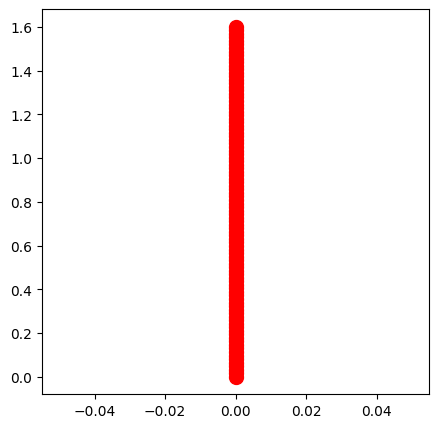

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
camera = Camera(fig)

t = np.linspace(0, 2, 100)

x0 = 0
y0 = -1

v_x = 0
v_y = 0.8

xs = v_x * t
ys = v_y * t 

for i in range(len(t)):
    ax.plot(xs[i], ys[i], 'ro')
    camera.snap()  # Captura el frame actual



In [71]:
import plotly.graph_objects as go
import numpy as np

# Constantes
N_ARROWS = 30
c = 1.0  # Velocidad de la luz (normalizada a 1)
ARROW_LENGTH = 0.5 # Longitud de la flecha
ARROW_COLOR = "yellow"
STAR_SIZE = 10

# Ángulos θ' (en el sistema en reposo S') distribuidos uniformemente
theta_prime_values = np.linspace(0, 2 * np.pi, N_ARROWS, endpoint=False)

# --- Funciones auxiliares ---
def calculate_gamma(u_val, c_val=1.0):
    beta_sq = (u_val / c_val)**2
    if beta_sq >= 1.0:
        return np.inf
    return 1.0 / np.sqrt(1.0 - beta_sq)

def calculate_aberrated_theta(theta_prime, u_val, gamma_val, c_val=1.0):
    numerator = c_val * np.sin(theta_prime)
    denominator = gamma_val * (c_val * np.cos(theta_prime) + u_val)
    if denominator == 0:
        if numerator == 0:
            return theta_prime
        return np.sign(numerator) * np.pi / 2
    theta_observed = np.arctan2(numerator, denominator)
    return theta_observed

# --- Crear la figura ---
fig = go.Figure()

# 1. Añadir el círculo unitario de referencia (para θ' y colas de flechas)
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
fig.add_trace(go.Scatter(
    x=x_circle,
    y=y_circle,
    mode='lines',
    name="Ref: θ' / Posición Colas", # Etiqueta actualizada
    line=dict(color='dimgray', dash='dot', width=1.5)
))

# 2. Añadir una traza para las estrellas en las colas de las flechas
# Esta traza se actualizará dinámicamente.
fig.add_trace(go.Scatter(
    x=[], y=[],
    mode='markers',
    marker=dict(symbol='star', size=STAR_SIZE, color=ARROW_COLOR),
    name='Estrellas (Colas)' # Etiqueta actualizada
))

# 3. Preparar el slider y las actualizaciones
beta_values = np.linspace(0, 0.995, 60)
sliders = [
    dict(
        active=0,
        currentvalue={"prefix": "Velocidad (u/c) = ", "font": {"size": 12}},
        pad={"t": 30, "b":10},
        steps=[]
    )
]

# Calcular datos iniciales (para beta=0) para las estrellas y anotaciones
initial_beta = beta_values[0]
initial_u = initial_beta * c
initial_gamma = calculate_gamma(initial_u, c)
initial_star_x = []
initial_star_y = []
initial_annotations = []

for tp_val in theta_prime_values:
    theta_o = calculate_aberrated_theta(tp_val, initial_u, initial_gamma, c)
    
    # La cola de la flecha (y estrella) está en el círculo unitario
    tail_x_unit = np.cos(theta_o)
    tail_y_unit = np.sin(theta_o)
    
    initial_star_x.append(tail_x_unit)
    initial_star_y.append(tail_y_unit)
    
    # La cabeza de la flecha está a una distancia ARROW_LENGTH de la cola, hacia el origen.
    # El vector unitario desde la cola hacia el origen es (-cos(theta_o), -sin(theta_o))
    # La posición de la cabeza es: (cola) - ARROW_LENGTH * (vector_unitario_desde_cola_a_origen)
    # que es equivalente a: (cola) + ARROW_LENGTH * (vector_unitario_desde_origen_a_cola)
    # o más simple: la cabeza está en (1 - ARROW_LENGTH) * (cos(theta_o), sin(theta_o))
    head_x = (1.0 - ARROW_LENGTH) * tail_x_unit
    head_y = (1.0 - ARROW_LENGTH) * tail_y_unit
    
    initial_annotations.append(
        dict(
            x=head_x, y=head_y,        # Cabeza de la flecha
            ax=tail_x_unit, ay=tail_y_unit, # Cola de la flecha
            xref='x', yref='y',
            axref='x', ayref='y',
            showarrow=True,
            arrowhead=2,
            arrowsize=1.2,
            arrowwidth=1.5,
            arrowcolor=ARROW_COLOR
        )
    )

fig.data[1].x = initial_star_x
fig.data[1].y = initial_star_y

# Generar los pasos del slider
for beta in beta_values:
    u_current = beta * c
    gamma_current = calculate_gamma(u_current, c)
    
    current_arrow_annotations_list = []
    current_star_x_list = []
    current_star_y_list = []

    for tp_val in theta_prime_values:
        theta_o = calculate_aberrated_theta(tp_val, u_current, gamma_current, c)
        
        # Cola de la flecha (y estrella) en el círculo unitario
        tail_x_unit = np.cos(theta_o)
        tail_y_unit = np.sin(theta_o)
        
        current_star_x_list.append(tail_x_unit)
        current_star_y_list.append(tail_y_unit)
        
        # Cabeza de la flecha a una distancia ARROW_LENGTH de la cola, hacia el origen
        head_x = (1.0 - ARROW_LENGTH) * tail_x_unit
        head_y = (1.0 - ARROW_LENGTH) * tail_y_unit
        
        current_arrow_annotations_list.append(
            dict(
                x=head_x, y=head_y,
                ax=tail_x_unit, ay=tail_y_unit,
                xref='x', yref='y',
                axref='x', ayref='y',
                showarrow=True,
                arrowhead=2,
                arrowsize=1.2,
                arrowwidth=1.5,
                arrowcolor=ARROW_COLOR
            )
        )
    
    slider_step = dict(
        method="update",
        args=[
            {"x": [None, current_star_x_list],
             "y": [None, current_star_y_list]},
            {
                "annotations": current_arrow_annotations_list,
                "title": f"Aberración Relativista (u/c = {beta:.3f})"
            }
        ],
        label=f"{beta:.3f}"
    )
    sliders[0]["steps"].append(slider_step)

# 4. Configuración del layout del gráfico
fig.update_layout(
    template="plotly_dark",
    title=f"Aberración Relativista (u/c = {beta_values[0]:.3f})",
    xaxis_title="x",
    yaxis_title="y",
    xaxis=dict(range=[-1.2, 1.2], zeroline=True, zerolinewidth=1, zerolinecolor='gray'), # Rango un poco mayor que 1
    yaxis=dict(range=[-1.2, 1.2], zeroline=True, zerolinewidth=1, zerolinecolor='gray', scaleanchor="x", scaleratio=1),
    width=500,
    height=550,
    sliders=sliders,
    annotations=initial_annotations,
    showlegend=True,
    legend=dict(
        yanchor="top", y=0.98,
        xanchor="left", x=0.02,
        bgcolor="rgba(0,0,0,0.5)",
        bordercolor="gray",
        font=dict(color="lightgray") # Color del texto de la leyenda
    ),
    margin=dict(l=40, r=40, t=60, b=40)
)

# --- Mostrar la figura ---
fig.show()

In [72]:
fig.write_json("aberracion_relativista.json", pretty=True)

In [79]:
import plotly.graph_objects as go
import numpy as np

# Constantes
N_ARROWS = 30
c = 1.0
ARROW_LENGTH = 0.5
ARROW_COLOR = "yellow"
STAR_SIZE = 10
EARTH_IMAGE_PATH = "./images/earth.png" # Asegúrate que esta ruta sea correcta
EARTH_IMAGE_SIZE = 0.3 # Tamaño de la imagen en unidades de los ejes

# Ángulos θ'
theta_prime_values = np.linspace(0, 2 * np.pi, N_ARROWS, endpoint=False)

# --- Funciones auxiliares (sin cambios) ---
def calculate_gamma(u_val, c_val=1.0):
    beta_sq = (u_val / c_val)**2
    if beta_sq >= 1.0: return np.inf
    return 1.0 / np.sqrt(1.0 - beta_sq)

def calculate_aberrated_theta(theta_prime, u_val, gamma_val, c_val=1.0):
    numerator = c_val * np.sin(theta_prime)
    denominator = gamma_val * (c_val * np.cos(theta_prime) + u_val)
    if denominator == 0:
        if numerator == 0: return theta_prime
        return np.sign(numerator) * np.pi / 2
    return np.arctan2(numerator, denominator)

# --- Crear la figura ---
fig = go.Figure()

# 1. Círculo unitario
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle, y_circle = np.cos(theta_circle), np.sin(theta_circle)
fig.add_trace(go.Scatter(
    x=x_circle, y=y_circle, mode='lines', name="Ref: θ' / Posición Colas",
    line=dict(color='dimgray', dash='dot', width=1.5)
))

# 2. Traza para estrellas
fig.add_trace(go.Scatter(
    x=[], y=[], mode='markers',
    marker=dict(symbol='star', size=STAR_SIZE, color=ARROW_COLOR),
    name='Estrellas (Colas)'
))

# 3. Slider y actualizaciones
beta_values = np.linspace(0, 0.995, 60)
sliders_list = [ # Renombrado para evitar conflicto con fig.layout.sliders
    dict(
        active=0,
        currentvalue={"prefix": "Velocidad (u/c) = ", "font": {"size": 12}},
        pad={"t": 30, "b":10},
        steps=[]
    )
]

initial_beta = beta_values[0]
initial_u, initial_gamma = initial_beta * c, calculate_gamma(initial_beta, c)
initial_star_x, initial_star_y, initial_annotations = [], [], []

for tp_val in theta_prime_values:
    theta_o = calculate_aberrated_theta(tp_val, initial_u, initial_gamma, c)
    tail_x_unit, tail_y_unit = np.cos(theta_o), np.sin(theta_o)
    initial_star_x.append(tail_x_unit)
    initial_star_y.append(tail_y_unit)
    head_x = (1.0 - ARROW_LENGTH) * tail_x_unit
    head_y = (1.0 - ARROW_LENGTH) * tail_y_unit
    initial_annotations.append(dict(
        x=head_x, y=head_y, ax=tail_x_unit, ay=tail_y_unit,
        xref='x', yref='y', axref='x', ayref='y', showarrow=True,
        arrowhead=2, arrowsize=1.2, arrowwidth=1.5, arrowcolor=ARROW_COLOR
    ))

fig.data[1].x, fig.data[1].y = initial_star_x, initial_star_y

for beta in beta_values:
    u_current, gamma_current = beta * c, calculate_gamma(beta, c)
    current_arrow_annotations_list, current_star_x_list, current_star_y_list = [], [], []
    for tp_val in theta_prime_values:
        theta_o = calculate_aberrated_theta(tp_val, u_current, gamma_current, c)
        tail_x_unit, tail_y_unit = np.cos(theta_o), np.sin(theta_o)
        current_star_x_list.append(tail_x_unit)
        current_star_y_list.append(tail_y_unit)
        head_x = (1.0 - ARROW_LENGTH) * tail_x_unit
        head_y = (1.0 - ARROW_LENGTH) * tail_y_unit
        current_arrow_annotations_list.append(dict(
            x=head_x, y=head_y, ax=tail_x_unit, ay=tail_y_unit,
            xref='x', yref='y', axref='x', ayref='y', showarrow=True,
            arrowhead=2, arrowsize=1.2, arrowwidth=1.5, arrowcolor=ARROW_COLOR
        ))
    sliders_list[0]["steps"].append(dict( # Usar sliders_list
        method="update",
        args=[
            {"x": [None, current_star_x_list], "y": [None, current_star_y_list]},
            {"annotations": current_arrow_annotations_list, "title": f"Aberración Relativista (u/c = {beta:.3f})"}
        ],
        label=f"{beta:.3f}"
    ))

# 4. Configuración del layout del gráfico
fig.update_layout(
    template="plotly_dark",
    title=f"Aberración Relativista (u/c = {beta_values[0]:.3f})",
    xaxis_title="x", yaxis_title="y",
    xaxis=dict(range=[-1.2, 1.2], zeroline=True, zerolinewidth=1, zerolinecolor='gray'),
    yaxis=dict(range=[-1.2, 1.2], zeroline=True, zerolinewidth=1, zerolinecolor='gray', scaleanchor="x", scaleratio=1),
    width=500, height=550,
    sliders=sliders_list, # Usar sliders_list
    annotations=initial_annotations,
    showlegend=True,
    legend=dict(
        yanchor="top", y=0.98, xanchor="left", x=0.02,
        bgcolor="rgba(0,0,0,0.5)", bordercolor="gray", font=dict(color="lightgray")
    ),
    margin=dict(l=40, r=40, t=60, b=40),

    # --- AÑADIR IMAGEN DE LA TIERRA ---
    images=[dict(
        source=EARTH_IMAGE_PATH, # Ruta a tu imagen
        xref="x", # Referencia de coordenadas al eje x
        yref="y", # Referencia de coordenadas al eje y
        x=0,      # Posición x central de la imagen
        y=0,      # Posición y central de la imagen
        sizex=EARTH_IMAGE_SIZE*3, # Ancho de la imagen en unidades del eje x
        sizey=EARTH_IMAGE_SIZE*3, # Alto de la imagen en unidades del eje y
        xanchor="center", # Anclar la imagen por su centro en la coordenada x
        yanchor="middle", # Anclar la imagen por su centro en la coordenada y (middle es para y)
        sizing="contain", # 'stretch', 'contain', o 'fill'
        layer="below" # Para que esté debajo de las flechas y estrellas
    )]
)

# --- Guardar la figura como JSON ---
fig.write_json("aberracion_relativista.json", pretty=True)
print("Figura guardada como aberracion_relativista.json")

# Opcional: mostrar figura
# fig.show()

Figura guardada como aberracion_relativista.json


In [81]:
import plotly.graph_objects as go
import numpy as np

# --- Parámetros de la simulación ---
P1_initial_pos = np.array([0., -1.]) # Posición inicial de la partícula 1
v_p1 = 0.8                           # Velocidad de la partícula 1 (fracción de c)
P2_pos = np.array([1., 0.])          # Posición de la partícula 2 (fija)
c = 1.0                              # Velocidad del fotón (c=1 por simplicidad)

# --- Cálculos para el evento de emisión y el impacto del fotón ---
t_emission = 0.0
P1_emission_pos = P1_initial_pos + np.array([0, v_p1 * t_emission]) # Posición de P1 al emitir
vec_photon_path = P2_pos - P1_emission_pos
dist_photon_path = np.linalg.norm(vec_photon_path)
time_photon_travel = dist_photon_path / c
t_impact = t_emission + time_photon_travel

# --- Parámetros de la animación ---
frame_duration_s = 0.04
num_frames = int(np.ceil(t_impact / frame_duration_s)) + 1
if num_frames < 2:
    num_frames = 2
times = np.linspace(t_emission, t_impact, num_frames)

# --- Crear los datos para la figura y las trazas iniciales ---

# Partícula 1
trace_p1 = go.Scatter(
    x=[P1_initial_pos[0]], y=[P1_initial_pos[1]],
    mode='markers', marker=dict(color='blue', size=12),
    name='Partícula 1'
)

# Fotón (MODIFICADO)
trace_photon = go.Scatter(
    x=[P1_emission_pos[0]], y=[P1_emission_pos[1]],
    mode='markers', marker=dict(color='yellow', size=8, symbol='circle'), # Cambio de color y símbolo
    name='Fotón'
)

# Partícula 2 (fija)
trace_p2 = go.Scatter(
    x=[P2_pos[0]], y=[P2_pos[1]],
    mode='markers', marker=dict(color='green', size=12, symbol='square'),
    name='Partícula 2 (Objetivo)'
)

# "Fantasma" de la Partícula 1 en el momento de la emisión
trace_ghost_p1 = go.Scatter(
    x=[P1_emission_pos[0]], y=[P1_emission_pos[1]],
    mode='markers',
    marker=dict(color='blue', size=12, opacity=0.4, symbol='circle-open'),
    name='P1 (en emisión)',
    visible=False
)

data = [trace_p1, trace_photon, trace_p2, trace_ghost_p1]

# --- Crear los frames de la animación ---
frames = []
for i, t in enumerate(times):
    current_p1_pos = P1_initial_pos + np.array([0, v_p1 * t])
    if t < t_emission:
        current_photon_pos = P1_emission_pos
    elif t_emission <= t <= t_impact:
        time_since_emission = t - t_emission
        fraction_path_covered = time_since_emission / time_photon_travel
        fraction_path_covered = min(fraction_path_covered, 1.0)
        current_photon_pos = P1_emission_pos + fraction_path_covered * vec_photon_path
    else:
        current_photon_pos = P2_pos
    is_last_frame = (i == num_frames - 1)
    frame_data = [
        go.Scatter(x=[current_p1_pos[0]], y=[current_p1_pos[1]]),
        go.Scatter(x=[current_photon_pos[0]], y=[current_photon_pos[1]]),
        go.Scatter(visible=is_last_frame)
    ]
    frames.append(go.Frame(
        data=frame_data,
        name=str(t),
        traces=[0, 1, 3]
    ))

# --- Configurar el Layout (MODIFICADO) ---
layout = go.Layout(
    title='Animación de Partícula y Fotón',
    width=400,  # Tamaño de la figura
    height=400, # Tamaño de la figura
    template='plotly_dark', # Modo oscuro
    xaxis=dict(
        range=[-0.5, 1.5], autorange=False, zeroline=False, title="X",
        gridcolor='rgba(128,128,128,0.3)', # Color de rejilla más sutil si es necesario
        linecolor='gray', # Color de la línea del eje
        mirror=True
    ),
    yaxis=dict(
        range=[-1.5, 0.5], autorange=False, zeroline=False, title="Y",
        scaleanchor="x", scaleratio=1,
        gridcolor='rgba(128,128,128,0.3)',
        linecolor='gray',
        mirror=True
    ),
    legend=dict(
        orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
        # El template 'plotly_dark' ajustará el color de la fuente de la leyenda
    ),
    margin=dict(l=40, r=40, b=40, t=60), # Ajustar márgenes si es necesario para el tamaño 400x400
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {"frame": {"duration": frame_duration_s * 1000, "redraw": True},
                         "fromcurrent": True,
                         "transition": {"duration": 0, "easing": "linear"},
                         "mode": "immediate"}]
        ), dict(
            label='Pause',
            method='animate',
            args=[[None], {"frame": {"duration": 0, "redraw": False},
                           "mode": "immediate",
                           "transition": {"duration": 0}}]
        )]
        # El template 'plotly_dark' ajustará el estilo de los botones
    )],
    sliders=[dict(
        steps=[dict(method='animate',
                    args=[[f.name], dict(mode='immediate',
                                         frame=dict(duration=frame_duration_s*1000, redraw=True),
                                         transition=dict(duration=0))],
                    label=f"{float(f.name):.2f}s") for f in frames],
        active=0,
        transition=dict(duration=0),
        x=0.05, # Ajustar posición del slider para el nuevo tamaño
        len=0.9,
        currentvalue=dict(font=dict(size=10), prefix="Tiempo: ", visible=True, xanchor="right")
        # El template 'plotly_dark' ajustará el color de la fuente
    )]
)

# --- Crear la figura y mostrar ---
fig = go.Figure(data=data, layout=layout, frames=frames)
fig.show()

print(f"Simulación: ")
print(f"  P1 inicia en: {P1_initial_pos}")
print(f"  P1 emite fotón en t={t_emission:.3f}s desde {P1_emission_pos}")
print(f"  P2 (objetivo) en: {P2_pos}")
print(f"  Distancia que recorre el fotón: {dist_photon_path:.3f} unidades")
print(f"  Tiempo de vuelo del fotón: {time_photon_travel:.3f}s")
print(f"  Fotón impacta P2 en t={t_impact:.3f}s")
print(f"  Posición de P1 en el momento del impacto: {P1_initial_pos + np.array([0, v_p1 * t_impact])}")
print(f"  Número de frames: {num_frames}")
print(f"  Duración por frame: {frame_duration_s*1000:.1f} ms")

Simulación: 
  P1 inicia en: [ 0. -1.]
  P1 emite fotón en t=0.000s desde [ 0. -1.]
  P2 (objetivo) en: [1. 0.]
  Distancia que recorre el fotón: 1.414 unidades
  Tiempo de vuelo del fotón: 1.414s
  Fotón impacta P2 en t=1.414s
  Posición de P1 en el momento del impacto: [0.         0.13137085]
  Número de frames: 37
  Duración por frame: 40.0 ms


In [82]:
fig.write_json("photon_animation.json", pretty=True)

In [86]:
import plotly.graph_objects as go
import numpy as np

# --- Parámetros de la simulación ---
P1_initial_pos = np.array([0., -1.])  # Posición inicial de P1 (emite desde aquí en t=0)
# P2_initial_pos se calculará
v_particle = 0.5                       # Velocidad de las partículas (fracción de c)
P_receptor_pos = np.array([1., 0.])    # Posición del receptor (y centro de la circunferencia)
R_circumference = 1.0                  # Radio de la circunferencia
c = 1.0                                # Velocidad del fotón (c=1 por simplicidad)

# --- Cálculos para el fotón de P1 y el evento de sincronización ---
t_emission_p1 = 0.0
P1_emission_pos = P1_initial_pos # P1 emite desde su posición inicial en t=0

# Fotón 1 viaja desde P1_emission_pos hacia P_receptor_pos
dist_P1_to_receptor = np.linalg.norm(P_receptor_pos - P1_emission_pos)

# Distancia que el Fotón 1 debe recorrer para tocar la circunferencia
# Asumimos que P1 está fuera de la circunferencia y emite hacia su centro (el receptor)
if dist_P1_to_receptor < R_circumference - 1e-9: # P1 está estrictamente dentro
    print("Advertencia: P1 está dentro de la circunferencia. La lógica de 'tocar' el borde desde afuera no aplica directamente.")
    # Para este caso, podríamos definir t_event = 0, o que "toca" cuando llega al receptor.
    # Dada la configuración (0,-1), P1 está fuera (dist_P1_to_receptor = sqrt(2) > 1)
    dist_photon1_to_touch_circumference = 0.0 # O manejar según una nueva definición
elif np.isclose(dist_P1_to_receptor, R_circumference): # P1 está en la circunferencia
    dist_photon1_to_touch_circumference = 0.0
else: # P1 está fuera de la circunferencia
    dist_photon1_to_touch_circumference = dist_P1_to_receptor - R_circumference

time_photon1_to_touch_circumference = dist_photon1_to_touch_circumference / c if c > 1e-9 else 0
t_event = t_emission_p1 + time_photon1_to_touch_circumference # Momento en que fotón1 toca la circ. y P2 emite

# --- Cálculos para P2 ---
# P2 debe estar en (0,0) en t_event y emite su fotón entonces.
t_emission_p2 = t_event
P2_emission_pos = np.array([0., 0.]) # Posición de P2 al emitir

# Calcular P2_initial_pos
# P2_pos(t) = P2_initial_pos + [0, v_particle * t]
# P2_pos(t_event) = P2_emission_pos
# P2_initial_pos_y + v_particle * t_event = P2_emission_pos_y (=0)
P2_initial_pos_y = P2_emission_pos[1] - v_particle * t_event
P2_initial_pos = np.array([P2_emission_pos[0], P2_initial_pos_y])


# --- Tiempos de impacto en el receptor y vectores de trayectoria de fotones ---
# Fotón 1
vec_photon1_path_full = P_receptor_pos - P1_emission_pos
time_photon1_travel_full = dist_P1_to_receptor / c if c > 1e-9 else (0 if dist_P1_to_receptor < 1e-9 else float('inf'))
t_impact_photon1 = t_emission_p1 + time_photon1_travel_full

# Fotón 2
vec_photon2_path_full = P_receptor_pos - P2_emission_pos
dist_photon2_path_full = np.linalg.norm(vec_photon2_path_full)
time_photon2_travel_full = dist_photon2_path_full / c if c > 1e-9 else (0 if dist_photon2_path_full < 1e-9 else float('inf'))
t_impact_photon2 = t_emission_p2 + time_photon2_travel_full

t_impact_receptor = t_impact_photon1 # Debería ser igual a t_impact_photon2

# --- Parámetros de la animación ---
frame_duration_s = 0.02
t_anim_start = 0.0
t_anim_end = t_impact_receptor

num_frames = int(np.ceil((t_anim_end - t_anim_start) / frame_duration_s)) + 1
if num_frames < 10: # Asegurar un mínimo de frames
    num_frames = 10
# Asegurar que haya un frame en/cerca de t_event si es significativo
if t_event > frame_duration_s and t_event < t_anim_end - frame_duration_s :
    num_frames = max(num_frames, int(np.ceil(t_event / frame_duration_s)) + int(np.ceil((t_anim_end - t_event) / frame_duration_s)) + 1)

times = np.linspace(t_anim_start, t_anim_end, num_frames)

# --- Crear los datos para la figura y las trazas iniciales ---
trace_p1 = go.Scatter(x=[P1_initial_pos[0]], y=[P1_initial_pos[1]], mode='markers', marker=dict(color='blue', size=12), name='Partícula 1')
trace_p2 = go.Scatter(x=[P2_initial_pos[0]], y=[P2_initial_pos[1]], mode='markers', marker=dict(color='red', size=12), name='Partícula 2')
trace_photon1 = go.Scatter(x=[P1_emission_pos[0]], y=[P1_emission_pos[1]], mode='markers', marker=dict(color='cyan', size=8, symbol='circle'), name='Fotón 1', visible=True)
trace_photon2 = go.Scatter(x=[P2_emission_pos[0]], y=[P2_emission_pos[1]], mode='markers', marker=dict(color='magenta', size=8, symbol='circle'), name='Fotón 2', visible=False) # Invisible hasta emisión
trace_receptor = go.Scatter(x=[P_receptor_pos[0]], y=[P_receptor_pos[1]], mode='markers', marker=dict(color='green', size=12, symbol='square'), name='Receptor')
trace_ghost_p1 = go.Scatter(x=[P1_emission_pos[0]], y=[P1_emission_pos[1]], mode='markers', marker=dict(color='blue', size=12, opacity=0.4, symbol='circle-open'), name='P1 (en emisión)', visible=True) # P1 emite en t=0
trace_ghost_p2 = go.Scatter(x=[P2_emission_pos[0]], y=[P2_emission_pos[1]], mode='markers', marker=dict(color='red', size=12, opacity=0.4, symbol='circle-open'), name='P2 (en emisión)', visible=False) # Invisible hasta emisión

data = [trace_p1, trace_p2, trace_photon1, trace_photon2, trace_receptor, trace_ghost_p1, trace_ghost_p2]

# --- Crear los frames de la animación ---
frames = []
for i, t_current in enumerate(times):
    current_p1_pos = P1_initial_pos + np.array([0, v_particle * t_current])
    current_p2_pos = P2_initial_pos + np.array([0, v_particle * t_current])

    # Fotón 1
    photon1_visible = (t_current >= t_emission_p1)
    if photon1_visible:
        dist_travelled1 = c * (t_current - t_emission_p1)
        if dist_P1_to_receptor > 1e-9:
            current_photon1_pos = P1_emission_pos + (vec_photon1_path_full / dist_P1_to_receptor) * min(dist_travelled1, dist_P1_to_receptor)
        else:
            current_photon1_pos = P_receptor_pos
    else:
        current_photon1_pos = P1_emission_pos # Permanece en P1_emission_pos si no visible (no debería pasar con t_emission_p1=0)

    # Fotón 2
    photon2_visible = (t_current >= t_emission_p2)
    if photon2_visible:
        dist_travelled2 = c * (t_current - t_emission_p2)
        if dist_photon2_path_full > 1e-9:
             current_photon2_pos = P2_emission_pos + (vec_photon2_path_full / dist_photon2_path_full) * min(dist_travelled2, dist_photon2_path_full)
        else:
            current_photon2_pos = P_receptor_pos
    else:
        current_photon2_pos = P2_emission_pos # Permanece en P2_emission_pos si no visible

    ghost_p2_visible = (t_current >= t_emission_p2)

    # Forzar posición final en el último frame
    if i == num_frames - 1:
        current_photon1_pos = P_receptor_pos
        current_photon2_pos = P_receptor_pos
        photon1_visible = True
        photon2_visible = True

    frame_data = [
        go.Scatter(x=[current_p1_pos[0]], y=[current_p1_pos[1]]),
        go.Scatter(x=[current_p2_pos[0]], y=[current_p2_pos[1]]),
        go.Scatter(x=[current_photon1_pos[0]], y=[current_photon1_pos[1]], visible=photon1_visible),
        go.Scatter(x=[current_photon2_pos[0]], y=[current_photon2_pos[1]], visible=photon2_visible),
        go.Scatter(visible=ghost_p2_visible) # trace_ghost_p2
    ]
    frames.append(go.Frame(data=frame_data, name=str(t_current), traces=[0, 1, 2, 3, 6]))

# --- Configurar el Layout ---
all_x = [P1_initial_pos[0], P2_initial_pos[0], P_receptor_pos[0], P_receptor_pos[0] + R_circumference, P_receptor_pos[0] - R_circumference]
all_y = [P1_initial_pos[1], P2_initial_pos[1], P_receptor_pos[1], P_receptor_pos[1] + R_circumference, P_receptor_pos[1] - R_circumference]
all_y.append((P1_initial_pos + np.array([0, v_particle * t_impact_receptor]))[1]) # P1 final Y
all_y.append((P2_initial_pos + np.array([0, v_particle * t_impact_receptor]))[1]) # P2 final Y

min_x_ax, max_x_ax = min(all_x) - 0.5, max(all_x) + 0.5
min_y_ax, max_y_ax = min(all_y) - 0.5, max(all_y) + 0.5

layout = go.Layout(
    title='Sincronización de Fotones con Circunferencia',
    width=500, height=500, template='plotly_dark',
    xaxis=dict(range=[min_x_ax, max_x_ax], autorange=False, zeroline=False, title="X", gridcolor='rgba(128,128,128,0.3)', linecolor='gray', mirror=True),
    yaxis=dict(range=[min_y_ax, max_y_ax], autorange=False, zeroline=False, title="Y", scaleanchor="x", scaleratio=1, gridcolor='rgba(128,128,128,0.3)', linecolor='gray', mirror=True),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=50, r=50, b=50, t=80),
    updatemenus=[dict(type='buttons', showactive=False, buttons=[
        dict(label='Play', method='animate', args=[None, {"frame": {"duration": frame_duration_s * 1000, "redraw": True}, "fromcurrent": True, "transition": {"duration": 0, "easing": "linear"}, "mode": "immediate"}]),
        dict(label='Pause', method='animate', args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}])])],
    sliders=[dict(steps=[dict(method='animate', args=[[f.name], dict(mode='immediate', frame=dict(duration=frame_duration_s*1000, redraw=True), transition=dict(duration=0))], label=f"{float(f.name):.3f}s") for f in frames],
                  active=0, transition=dict(duration=0), x=0.05, len=0.9, currentvalue=dict(font=dict(size=10), prefix="Tiempo: ", visible=True, xanchor="right"))],
    shapes=[dict(type="circle", xref="x", yref="y", x0=P_receptor_pos[0] - R_circumference, y0=P_receptor_pos[1] - R_circumference, x1=P_receptor_pos[0] + R_circumference, y1=P_receptor_pos[1] + R_circumference, line_color="LightSeaGreen", line_width=1, opacity=0.7)]
)

fig = go.Figure(data=data, layout=layout, frames=frames)
fig.show()

print(f"Simulación:")
print(f"  P1 inicia en: {P1_initial_pos} y emite en t={t_emission_p1:.3f}s.")
print(f"  P2 inicia en: {P2_initial_pos} (calculado).")
print(f"  Velocidad de partículas: {v_particle:.2f}c, Velocidad fotón: {c:.1f}c.")
print(f"  Receptor en: {P_receptor_pos}, Circunferencia Radio: {R_circumference:.1f}.")
print(f"  Fotón de P1 toca la circunferencia en t_event={t_event:.3f}s.")
print(f"  P2 llega a (0,0) y emite su fotón en t_emission_p2={t_emission_p2:.3f}s.")
print(f"  Posición de P2 al emitir (P2_emission_pos): {P2_emission_pos}")
print(f"  Fotón 1 viaja {dist_P1_to_receptor:.3f} unidades, tiempo total de vuelo: {time_photon1_travel_full:.3f}s.")
print(f"  Fotón 2 viaja {dist_photon2_path_full:.3f} unidades, tiempo total de vuelo: {time_photon2_travel_full:.3f}s.")
print(f"  Ambos fotones impactan el receptor en t={t_impact_receptor:.3f}s.")
print(f"     (Verificación impacto P1: {t_emission_p1 + time_photon1_travel_full:.3f}s, P2: {t_emission_p2 + time_photon2_travel_full:.3f}s)")
print(f"  Posición de P1 en impacto: {P1_initial_pos + np.array([0, v_particle * t_impact_receptor])}")
print(f"  Posición de P2 en impacto: {P2_initial_pos + np.array([0, v_particle * t_impact_receptor])}")
print(f"  Animación de t={t_anim_start:.3f}s a t={t_anim_end:.3f}s con {num_frames} frames.")

Simulación:
  P1 inicia en: [ 0. -1.] y emite en t=0.000s.
  P2 inicia en: [ 0.         -0.20710678] (calculado).
  Velocidad de partículas: 0.50c, Velocidad fotón: 1.0c.
  Receptor en: [1. 0.], Circunferencia Radio: 1.0.
  Fotón de P1 toca la circunferencia en t_event=0.414s.
  P2 llega a (0,0) y emite su fotón en t_emission_p2=0.414s.
  Posición de P2 al emitir (P2_emission_pos): [0. 0.]
  Fotón 1 viaja 1.414 unidades, tiempo total de vuelo: 1.414s.
  Fotón 2 viaja 1.000 unidades, tiempo total de vuelo: 1.000s.
  Ambos fotones impactan el receptor en t=1.414s.
     (Verificación impacto P1: 1.414s, P2: 1.414s)
  Posición de P1 en impacto: [ 0.         -0.29289322]
  Posición de P2 en impacto: [0.  0.5]
  Animación de t=0.000s a t=1.414s con 72 frames.


In [87]:
fig.write_json("synchronization_animation.json", pretty=True)

In [3]:
import pyvista as pv
import numpy as np

# --- Parámetros Globales ---
CONE_HEIGHT = 2.0  # Altura total del doble cono (de -ct_max a +ct_max)
CONE_RADIUS_AT_MAX_CT = CONE_HEIGHT / 2.0  # En unidades c=1, radio = ct
PLANE_SIZE = 3.0  # Tamaño del plano de simultaneidad
LINE_START = np.array([1.0, -1.0, 0.0]) # x, y, ct
LINE_END = np.array([1.0, 1.0, 0.0])   # x, y, ct

# --- Crear el Plotter ---
# Usamos pv.Plotter() para una ventana interactiva
plotter = pv.Plotter(window_size=[800, 700])
plotter.set_background("black")

# --- Ejes (x: rojo, y: verde, ct: azul) ---
# PyVista usa X, Y, Z. Mapeamos: x_espacial -> X, y_espacial -> Y, ct -> Z
plotter.add_axes(labels_off=False) # Muestra ejes con etiquetas X, Y, Z
# Añadir etiquetas personalizadas para los ejes
plotter.add_text("x", position=[CONE_RADIUS_AT_MAX_CT + 0.3, 0, 0], color="red", font_size=10)
plotter.add_text("y", position=[0, CONE_RADIUS_AT_MAX_CT + 0.3, 0], color="green", font_size=10)
plotter.add_text("ct", position=[0, 0, CONE_HEIGHT/2 + 0.3], color="blue", font_size=10)


# --- Cono de Luz ---
# Cono Futuro (ct > 0)
cone_future = pv.Cone(center=(0, 0, CONE_HEIGHT / 4),
                      direction=(0, 0, 1), # Apunta hacia +Z (+ct)
                      height=CONE_HEIGHT / 2,
                      radius=CONE_RADIUS_AT_MAX_CT,
                      resolution=50, # Más segmentos para suavidad
                      capping=False) # Sin tapa en la base
plotter.add_mesh(cone_future, color="yellow", style="wireframe", opacity=0.5, line_width=2)

# Cono Pasado (ct < 0)
cone_past = pv.Cone(center=(0, 0, -CONE_HEIGHT / 4),
                    direction=(0, 0, -1), # Apunta hacia -Z (-ct)
                    height=CONE_HEIGHT / 2,
                    radius=CONE_RADIUS_AT_MAX_CT,
                    resolution=50,
                    capping=False)
plotter.add_mesh(cone_past, color="yellow", style="wireframe", opacity=0.5, line_width=2)

# --- Línea en el plano xy (ct=0) ---
line_segment = pv.Line(LINE_START, LINE_END)
plotter.add_mesh(line_segment, color="magenta", line_width=5)

# --- Plano Interactivo ---
# El plano tiene la ecuación ct = beta * (x - x_linea)
# Donde x_linea es la coordenada x de nuestra línea vertical (x=1)
# ct = beta * (x - 1)  =>  beta*x - ct - beta = 0
# La normal al plano es (beta, 0, -1) en coordenadas (x, y, ct)
# El centro del plano lo pondremos en el punto medio de la línea
plane_center = (LINE_START + LINE_END) / 2

# Actor del plano (para poderlo actualizar)
# Inicializamos con beta = 0 (plano ct=0)
initial_beta = 0.0
initial_normal = np.array([initial_beta, 0, -1.0])
# Normalizar la normal, aunque pv.Plane lo hace internamente
# if np.linalg.norm(initial_normal) > 0:
# initial_normal /= np.linalg.norm(initial_normal)

plane_mesh = pv.Plane(center=plane_center,
                      direction=initial_normal, # direction es la normal del plano
                      i_size=PLANE_SIZE, j_size=PLANE_SIZE, # Tamaño del plano
                      i_resolution=1, j_resolution=1) # Solo un cuadrilátero

# Guardamos el actor del plano para poderlo eliminar y recrear
# PyVista no permite modificar directamente la normal de un mesh existente de forma sencilla
# y que se actualice el render. Es más fácil remover y añadir.
# Sin embargo, para este caso, podemos intentar actualizar los puntos del mesh.
# Más robusto: remover y añadir.
plane_actor = plotter.add_mesh(plane_mesh, color="cyan", opacity=0.6, show_edges=True)

# --- Función de Callback para el Slider ---
# Global para poderlo modificar desde el callback
current_plane_actor = plane_actor

def update_plane_inclination(beta_value):
    global current_plane_actor # Necesario para modificar la variable global

    # Eliminar el actor del plano anterior
    if current_plane_actor:
        plotter.remove_actor(current_plane_actor, render=False) # No renderizar aún

    # Calcular la nueva normal del plano
    # ct = beta * (x - 1)  =>  beta*x - ct - beta = 0
    # Normal (en x, y, ct) es (beta, 0, -1)
    new_normal = np.array([beta_value, 0.0, -1.0])

    # Si beta es 0, normal es (0,0,-1). Si beta es grande, la componente x domina.
    # El vector (0,0,0) no es una normal válida, pero beta está limitado, así que no pasará.

    # Crear el nuevo mesh del plano
    updated_plane_mesh = pv.Plane(center=plane_center,
                                  direction=new_normal,
                                  i_size=PLANE_SIZE, j_size=PLANE_SIZE,
                                  i_resolution=1, j_resolution=1)

    # Añadir el nuevo actor del plano
    current_plane_actor = plotter.add_mesh(updated_plane_mesh, color="cyan", opacity=0.6, show_edges=True)
    # plotter.render() # Renderizar los cambios (se hace al final del callback del slider)


# --- Añadir Slider para la velocidad (beta) ---
# Rango de beta de -0.95 a 0.95 (para evitar singularidades visuales en |beta|=1 si el plano fuera infinito)
plotter.add_slider_widget(
    callback=update_plane_inclination,
    rng=[-0.95, 0.95], # Rango de beta (v/c)
    value=0.0,         # Valor inicial
    title="Velocidad (β = v/c)",
    pointa=(0.7, 0.9), # Posición del slider en la ventana (fracciones)
    pointb=(0.95, 0.9),
    style='modern'
)

# --- Configuración de la Cámara y Visualización ---
plotter.camera_position = 'iso' # Vista isométrica inicial
# O una posición más específica:
# plotter.camera_position = [(4, 4, 3), (0,0,0), (0,0,1)] # (pos, focal_point, view_up)
plotter.camera.azimuth = 30
plotter.camera.elevation = 20
plotter.camera.zoom(1.2)

plotter.enable_zoom_scaling() # Permite hacer zoom con la rueda del ratón

# Mostrar la escena
print("Interactúa con la ventana. Mueve el slider 'Velocidad'.")
print("Controles de cámara: Botón izquierdo para rotar, medio para pan, derecho o rueda para zoom.")
plotter.show()

AttributeError: 'Plotter' object has no attribute 'enable_zoom_scaling'

In [5]:
import plotly.graph_objects as go
import numpy as np

# --- Parámetros ---
CT_MAX = 2.0  # Máxima "altura" (ct) del cono
N_POINTS_CONE = 50 # Puntos para definir la superficie del cono
PLANE_EXTENT_FACTOR = 1.8 # Cuán lejos se extiende el plano más allá de la línea
LINE_X_POS = 1.0
LINE_Y_MIN = -1.0
LINE_Y_MAX = 1.0

# --- Funciones para generar geometrías ---

def get_cone_surface(ct_max, n_points, future=True):
    """Genera los puntos para la superficie de un cono de luz."""
    # En unidades c=1, el radio espacial r = |ct|
    # Usamos ct como el parámetro que varía a lo largo del eje del cono
    # y theta para el ángulo azimutal.
    ct_abs_vals = np.linspace(0, ct_max, n_points // 2)
    theta_vals = np.linspace(0, 2 * np.pi, n_points)
    
    ct_grid, theta_grid = np.meshgrid(ct_abs_vals, theta_vals)
    
    # Coordenadas cilíndricas: r = ct_abs_vals
    x = ct_grid * np.cos(theta_grid)
    y = ct_grid * np.sin(theta_grid)
    
    if future:
        z_ct = ct_grid # ct > 0
    else:
        z_ct = -ct_grid # ct < 0
        
    return x, y, z_ct

def get_plane_surface(beta, line_x_pos, line_y_min, line_y_max, extent_factor):
    """Genera los puntos para el plano ct = beta * (x - line_x_pos)."""
    # El plano debe extenderse alrededor de la línea
    x_center = line_x_pos
    y_center = (line_y_min + line_y_max) / 2
    y_span_half = (line_y_max - line_y_min) / 2
    
    # Definimos el rango del plano en x e y
    # Queremos que el plano contenga la línea y se extienda un poco más
    x_plane = np.linspace(x_center - y_span_half * extent_factor, 
                          x_center + y_span_half * extent_factor, 20)
    y_plane = np.linspace(y_center - y_span_half * extent_factor, 
                          y_center + y_span_half * extent_factor, 20)
    
    x_grid, y_grid = np.meshgrid(x_plane, y_plane)
    
    # Ecuación del plano: ct = beta * (x - x_linea)
    ct_grid = beta * (x_grid - line_x_pos)
    return x_grid, y_grid, ct_grid

# --- Crear la figura inicial ---
fig = go.Figure()

# 1. Cono de Luz Futuro
x_cone_f, y_cone_f, z_cone_f = get_cone_surface(CT_MAX, N_POINTS_CONE, future=True)
fig.add_trace(go.Surface(x=x_cone_f, y=y_cone_f, z=z_cone_f,
                         colorscale=[[0, 'yellow'], [1, 'yellow']], # Color uniforme
                         opacity=0.3,
                         showscale=False, # No mostrar barra de color para el cono
                         name="Cono Futuro (ct > 0)"))

# 2. Cono de Luz Pasado
x_cone_p, y_cone_p, z_cone_p = get_cone_surface(CT_MAX, N_POINTS_CONE, future=False)
fig.add_trace(go.Surface(x=x_cone_p, y=y_cone_p, z=z_cone_p,
                         colorscale=[[0, 'yellow'], [1, 'yellow']],
                         opacity=0.3,
                         showscale=False,
                         name="Cono Pasado (ct < 0)"))

# 3. Línea segmento de (1,-1,0) a (1,1,0)
line_x = [LINE_X_POS, LINE_X_POS]
line_y = [LINE_Y_MIN, LINE_Y_MAX]
line_ct = [0, 0]
fig.add_trace(go.Scatter3d(x=line_x, y=line_y, z=line_ct,
                           mode='lines',
                           line=dict(color='magenta', width=7),
                           name=f"Línea (x={LINE_X_POS}, ct=0)"))

# 4. Plano de Simultaneidad (inicial con beta=0)
initial_beta = 0.0
x_plane, y_plane, z_plane = get_plane_surface(initial_beta, LINE_X_POS, LINE_Y_MIN, LINE_Y_MAX, PLANE_EXTENT_FACTOR)
fig.add_trace(go.Surface(x=x_plane, y=y_plane, z=z_plane,
                         colorscale=[[0, 'cyan'], [1, 'cyan']], # Color uniforme
                         opacity=0.7,
                         showscale=False,
                         name="Plano de Simultaneidad"))

# --- Configuración del Layout y Slider ---
beta_values = np.linspace(-0.95, 0.95, 41) # Valores para beta (v/c)
# Encuentra el índice para beta=0.0 para el valor activo inicial del slider
active_slider_idx = np.where(np.isclose(beta_values, 0.0))[0][0]


sliders = [
    dict(
        active=int(active_slider_idx),
        currentvalue={"prefix": "β (v/c) = ", "font": {"size": 16}},
        pad={"t": 50}, # Espacio superior para el título del slider
        steps=[]
    )
]

for beta in beta_values:
    # Recalcular solo el plano para cada valor de beta
    _, _, z_plane_updated = get_plane_surface(beta, LINE_X_POS, LINE_Y_MIN, LINE_Y_MAX, PLANE_EXTENT_FACTOR)
    step = dict(
        method="restyle", # 'restyle' es más eficiente para cambiar datos de un trace
        args=[{"z": [z_plane_updated.tolist()]}, [3]], # Actualiza el 'z' del cuarto trace (índice 3, el plano)
        # El primer argumento de args es un diccionario de atributos a cambiar.
        # El segundo argumento es una lista de índices de los traces a los que aplicar los cambios.
        label=f"{beta:.2f}"
    )
    sliders[0]["steps"].append(step)

fig.update_layout(
    title_text="Cono de Luz 3D Interactivo con Plano de Simultaneidad",
    title_x=0.5,
    scene=dict(
        xaxis_title="x (espacial)",
        yaxis_title="y (espacial)",
        zaxis_title="ct (tiempo-luz)",
        xaxis=dict(range=[-CT_MAX*1.2, CT_MAX*1.2], autorange=False, zerolinecolor='gray', zerolinewidth=2),
        yaxis=dict(range=[-CT_MAX*1.2, CT_MAX*1.2], autorange=False, zerolinecolor='gray', zerolinewidth=2),
        zaxis=dict(range=[-CT_MAX*1.1, CT_MAX*1.1], autorange=False, zerolinecolor='gray', zerolinewidth=2),
        aspectratio=dict(x=1, y=1, z=1), # Para que los ejes tengan la misma escala visual
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.0) # Posición inicial de la cámara
        )
    ),
    scene_dragmode='orbit', # Permite rotar con el ratón
    sliders=sliders,
    legend=dict(orientation="h", yanchor="bottom", y=0.01, xanchor="center", x=0.5)
)

# Mostrar la figura
fig.show()

In [6]:
import plotly.graph_objects as go
import numpy as np

# --- Parámetros ---
CT_MAX = 2.0  # Máxima "altura" (ct) del cono y extensión de la línea de universo
N_POINTS_CONE = 50 # Puntos para definir la superficie del cono
N_POINTS_LINE = 100 # Puntos para la línea de universo

# --- Funciones para generar geometrías ---

def get_cone_surface(ct_max, n_points, future=True):
    """Genera los puntos para la superficie de un cono de luz."""
    ct_abs_vals = np.linspace(0.01, ct_max, n_points // 2) # Empezar un poco > 0 para evitar singularidad en el vértice
    theta_vals = np.linspace(0, 2 * np.pi, n_points)
    ct_grid, theta_grid = np.meshgrid(ct_abs_vals, theta_vals)
    
    x = ct_grid * np.cos(theta_grid)
    y = ct_grid * np.sin(theta_grid) # Para el cono 3D, pero la línea de universo estará en el plano y=0
    
    if future:
        z_ct = ct_grid
    else:
        z_ct = -ct_grid
        
    return x, y, z_ct

def get_world_line_3d(beta, ct_max, n_points):
    """
    Genera los puntos para la línea de universo de una partícula que se mueve
    solo a lo largo del eje x.
    La línea de universo es x = beta * ct.
    En nuestro gráfico, ct es el eje Z, x es el eje X.
    Así que: X = beta * Z
    """
    z_ct_vals = np.linspace(-ct_max, ct_max, n_points)
    x_vals = beta * z_ct_vals
    y_vals = np.zeros_like(z_ct_vals) # Movimiento solo en dirección x
    return x_vals, y_vals, z_ct_vals

# --- Crear la figura inicial ---
fig = go.Figure()

# 1. Cono de Luz Futuro
x_cone_f, y_cone_f, z_cone_f = get_cone_surface(CT_MAX, N_POINTS_CONE, future=True)
fig.add_trace(go.Surface(x=x_cone_f, y=y_cone_f, z=z_cone_f,
                         colorscale=[[0, 'yellow'], [1, 'yellow']],
                         opacity=0.25,
                         showscale=False,
                         name="Cono Futuro (ct > 0)"))

# 2. Cono de Luz Pasado
x_cone_p, y_cone_p, z_cone_p = get_cone_surface(CT_MAX, N_POINTS_CONE, future=False)
fig.add_trace(go.Surface(x=x_cone_p, y=y_cone_p, z=z_cone_p,
                         colorscale=[[0, 'yellow'], [1, 'yellow']],
                         opacity=0.25,
                         showscale=False,
                         name="Cono Pasado (ct < 0)"))

# 3. Línea de Universo (inicial con beta=0)
initial_beta = 0.0
x_wl, y_wl, z_wl = get_world_line_3d(initial_beta, CT_MAX, N_POINTS_LINE)
fig.add_trace(go.Scatter3d(x=x_wl, y=y_wl, z=z_wl,
                           mode='lines',
                           line=dict(color='cyan', width=7),
                           name="Línea de Universo (x = β·ct)"))

# 4. Puntos de intersección (inicialmente pueden no existir o ser el origen)
# La intersección ocurre cuando x = beta*ct Y x^2 + y^2 = (ct)^2 (ecuación del cono)
# Como y=0 para la línea de universo, (beta*ct)^2 = (ct)^2
# beta^2 * ct^2 = ct^2
# Si ct != 0: beta^2 = 1 => |beta| = 1.
# Si |beta| < 1, la única intersección es en el origen (ct=0, x=0).
# Si |beta| = 1, la línea de universo está EN el cono de luz.
# Si |beta| > 1 (no permitido físicamente para partículas masivas), no hay intersección excepto el origen.

# Para visualizar, si |beta|=1, toda la línea está en el cono.
# Si |beta|<1, el único punto de intersección "real" es el origen.
# No vamos a dibujar un punto específico de intersección más allá del origen,
# ya que la línea entera (para beta=1) o solo el origen (para beta<1) es la "intersección".
# Lo que podemos hacer es cambiar el color de la línea de universo si beta=1.

# Placeholder para la "intersección" (más bien, para indicar si la línea está en el cono)
# No será un punto discreto a menos que quieras mostrar el origen
# Para beta = 1 o -1, la línea entera es la intersección.
# Para beta < 1, solo el origen (0,0,0) es la intersección.
# Vamos a añadir un punto en el origen para que siempre esté visible
fig.add_trace(go.Scatter3d(x=[0], y=[0], z=[0],
                           mode='markers',
                           marker=dict(color='red', size=8, symbol='diamond'),
                           name="Origen (Evento)"))


# --- Configuración del Layout y Slider ---
beta_values = np.linspace(-1.0, 1.0, 41) # Valores para beta (v/c), incluyendo -1 y 1
active_slider_idx = np.where(np.isclose(beta_values, initial_beta))[0][0]

sliders = [
    dict(
        active=int(active_slider_idx),
        currentvalue={"prefix": "β (v/c) = ", "font": {"size": 16}},
        pad={"t": 50},
        steps=[]
    )
]

for beta_val in beta_values:
    x_wl_updated, y_wl_updated, z_wl_updated = get_world_line_3d(beta_val, CT_MAX, N_POINTS_LINE)
    
    line_color = 'cyan'
    line_width = 7
    if np.isclose(np.abs(beta_val), 1.0): # Si la velocidad es c
        line_color = 'lime' # Verde brillante para indicar que está en el cono de luz
        line_width = 9

    step = dict(
        method="restyle",
        args=[
            {"x": [x_wl_updated.tolist()], "y": [y_wl_updated.tolist()], "z": [z_wl_updated.tolist()],
             "line.color": [line_color], "line.width": [line_width]}, # Atributos a cambiar
            [2] # Índice del trace de la línea de universo (el tercer trace, índice 2)
        ],
        label=f"{beta_val:.2f}"
    )
    sliders[0]["steps"].append(step)

fig.update_layout(
    title_text="Cono de Luz 3D con Línea de Universo Interactiva",
    title_x=0.5,
    scene=dict(
        xaxis_title="x (espacial)",
        yaxis_title="y (espacial)",
        zaxis_title="ct (tiempo-luz)",
        xaxis=dict(range=[-CT_MAX*1.1, CT_MAX*1.1], autorange=False, zerolinecolor='gray', zerolinewidth=2),
        yaxis=dict(range=[-CT_MAX*1.1, CT_MAX*1.1], autorange=False, zerolinecolor='gray', zerolinewidth=2), # y es menos relevante aquí
        zaxis=dict(range=[-CT_MAX*1.1, CT_MAX*1.1], autorange=False, zerolinecolor='gray', zerolinewidth=2),
        aspectratio=dict(x=1, y=1, z=1),
        camera=dict(
            eye=dict(x=1.0, y=2.0, z=0.7) # Ajustar vista para ver mejor el plano x-ct
        )
    ),
    scene_dragmode='orbit',
    sliders=sliders,
    legend=dict(orientation="h", yanchor="bottom", y=0.01, xanchor="center", x=0.5)
)

# Asegurar que el eje Y no domine la vista si no es relevante
fig.update_scenes(yaxis_showticklabels=False, yaxis_title="")


# Mostrar la figura
fig.show()